<a href="https://colab.research.google.com/github/Stapleru/ml/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт всего необходимого

In [151]:

import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn import preprocessing
import random
le = preprocessing.LabelEncoder()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from datetime import datetime
%matplotlib inline     

#Проверка таблицы

In [152]:
#from google.colab import drive
#drive.mount('/content/drive/')
import os
#os.chdir("/content/drive/My Drive/Colab Notebooks")
df = pd.read_csv("../data/genres_v2.csv")

C:\Users\Stapler\AppData\Local\Temp\ipykernel_20616\4040520011.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/genres_v2.csv")


In [153]:
#df = pd.read_csv("genres_v2.csv")
df.head(5)      

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

# Стоит отбросить ненужные столбцы

In [155]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [156]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

# Совершенно не нужны - id, uri, track_href, alaysis_url, song_name, Unnamed: 0, title

In [157]:
df = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title','genre'], axis=1)
df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4


# Также стоит дропнуть дупликаты

In [158]:
print("duplicates: ", df[df.duplicated()].shape)
df = df.drop_duplicates()
df = df.dropna()

# remove_n = 25000
# drop_indices = np.random.choice(df.index, remove_n, replace=False)
# df = df.drop(drop_indices)


df.count()


duplicates:  (7212, 13)


danceability        35093
energy              35093
key                 35093
loudness            35093
mode                35093
speechiness         35093
acousticness        35093
instrumentalness    35093
liveness            35093
valence             35093
tempo               35093
duration_ms         35093
time_signature      35093
dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35093 entries, 0 to 42304
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      35093 non-null  float64
 1   energy            35093 non-null  float64
 2   key               35093 non-null  int64  
 3   loudness          35093 non-null  float64
 4   mode              35093 non-null  int64  
 5   speechiness       35093 non-null  float64
 6   acousticness      35093 non-null  float64
 7   instrumentalness  35093 non-null  float64
 8   liveness          35093 non-null  float64
 9   valence           35093 non-null  float64
 10  tempo             35093 non-null  float64
 11  duration_ms       35093 non-null  int64  
 12  time_signature    35093 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 3.7 MB


In [160]:
# c = df.copy()
# c['genre']  = le.fit_transform(c['genre'])
# c.info()

In [161]:
# histograms = c.hist(figsize=(10,10))
# plt.show()

In [162]:
# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
# for col in df.select_dtypes(include=np.number).columns.tolist():
#   df.boxplot(by ='genre', column =[col], grid = True)

In [163]:
#pd.plotting.scatter_matrix(df, figsize = [20,20]) #- если вдруг захочется посмотреть на матрицы рассеивания

In [164]:
X = df.copy()
# X['genre']  = le.fit_transform(X['genre'])
y = X.pop('duration_ms') 
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,4
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,4
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,4
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,3
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,4
...,...,...,...,...,...,...,...,...,...,...,...,...
42298,0.502,0.991,5,-4.333,0,0.2400,0.005540,0.000198,0.4700,0.0797,150.029,4
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,4
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,4
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,4


In [165]:
# sm=SMOTE()
# X_std = preprocessing.StandardScaler().fit_transform(X)
# X,y=sm.fit_resample(X_std,y)

(array([1.2100e+03, 1.1427e+04, 1.2580e+04, 4.5170e+03, 3.8740e+03,
        1.3040e+03, 1.5600e+02, 1.7000e+01, 4.0000e+00, 4.0000e+00]),
 array([ 25600. , 114345.2, 203090.4, 291835.6, 380580.8, 469326. ,
        558071.2, 646816.4, 735561.6, 824306.8, 913052. ]),
 <BarContainer object of 10 artists>)

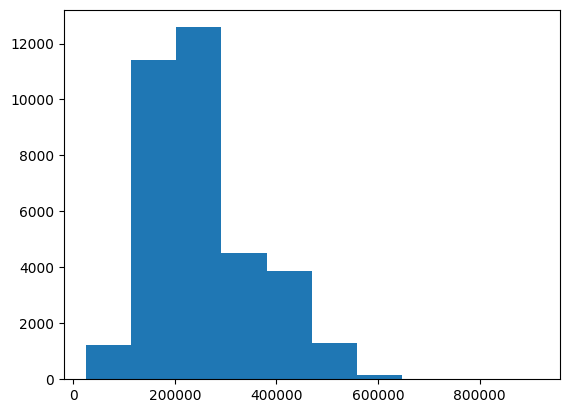

In [166]:
#  y.value_counts().plot(kind="bar", title="duration_ms")
plt.hist(df.duration_ms)

# **ОТСЮДА НАЧИНАЕТСЯ ПО ФАКТУ ТРЕТЬЯ РАБОТА**

# Linear regress

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [168]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [169]:
lin.coef_

array([ 5.14030401e+04,  1.23848400e+05,  7.53529450e+02, -4.49154265e+03,
       -1.66707653e+03, -7.52592180e+04, -2.63163005e+04,  1.24554754e+05,
        2.00991785e+03, -2.54896109e+04, -5.81243490e+01,  1.19671318e+03])

In [170]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test,lin.predict(X_test)))

62080.41320731539


In [171]:
print(mean_squared_error(y_test,lin.predict(X_test)))

6407467898.905166


# Decision Tree

In [172]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

54485.8791917781


In [173]:
print(mean_squared_error(y_test, y_pred))

5593757190.967932


# Lasso

In [174]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso.coef_
lasso.score(X_test,y_test)

0.40026218024290794

In [175]:
lasso = Lasso(alpha=200)
lasso.fit(X_train, y_train)
lasso.coef_
lasso.score(X_test,y_test)

0.3991153838311694

In [176]:
n_alphas = 1000
alphas = np.linspace(0.1, 200, n_alphas)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=17)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-01, 3.00100100e-01, 5.00200200e-01, 7.00300300e-01,
       9.00400400e-01, 1.10050050e+00, 1.30060060e+00, 1.50070070e+00,
       1.70080080e+00, 1.90090090e+00, 2.10100100e+00, 2.30110110e+00,
       2.50120120e+00, 2.70130130e+00, 2.90140140e+00, 3.10150150e+00,
       3.30160160e+00, 3.50170170e+00, 3.70180180e+00, 3.90190190e+00,
       4.10200200e+00, 4.30210210e+0...
       1.95397698e+02, 1.95597798e+02, 1.95797898e+02, 1.95997998e+02,
       1.96198098e+02, 1.96398198e+02, 1.96598298e+02, 1.96798398e+02,
       1.96998498e+02, 1.97198599e+02, 1.97398699e+02, 1.97598799e+02,
       1.97798899e+02, 1.97998999e+02, 1.98199099e+02, 1.98399199e+02,
       1.98599299e+02, 1.98799399e+02, 1.98999499e+02, 1.99199600e+02,
       1.99399700e+02, 1.99599800e+02, 1.99799900e+02, 2.00000000e+02]),
        cv=5, random_state=17)

In [177]:
lasso_cv.coef_

array([ 5.13933035e+04,  1.23842225e+05,  7.53542888e+02, -4.49132732e+03,
       -1.66659748e+03, -7.52510775e+04, -2.63157238e+04,  1.24556505e+05,
        2.00585322e+03, -2.54859767e+04, -5.81421682e+01,  1.19561134e+03])

In [178]:
lasso_cv.alpha_

0.1

In [179]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
cross_val_score(Lasso(lasso_cv.alpha_), X_train, y_train, cv=5, scoring="neg_mean_squared_error")

array([-6.41839684e+09, -6.51034845e+09, -6.42630485e+09, -6.58148347e+09,
       -7.03801092e+09])

In [180]:
abs(
    np.mean(
        cross_val_score(
            Lasso(lasso_cv.alpha_), X_train, y_train, cv=5, scoring="neg_mean_squared_error"
        )
    )
)

6594908905.778778

# Ridge

In [185]:
n_alphas = 1000
ridge_alphas = np.logspace(0.1, 200, n_alphas)
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring="neg_mean_squared_error", cv=5)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.25892541e+000, 1.99572225e+000, 3.16373574e+000, 5.01533908e+000,
       7.95060908e+000, 1.26037709e+001, 1.99802354e+001, 3.16738387e+001,
       5.02112231e+001, 7.95977700e+001, 1.26183044e+002, 2.00032748e+002,
       3.17103621e+002, 5.02691222e+002, 7.96895550e+002, 1.26328547e+003,
       2.00263408e+003, 3.17469276e+003, 5.03270880e+003, 7.97814457e+003,
       1.264742...
       1.57796766e+196, 2.50148670e+196, 3.96550314e+196, 6.28634770e+196,
       9.96548635e+196, 1.57978723e+197, 2.50437119e+197, 3.97007580e+197,
       6.29359655e+197, 9.97697764e+197, 1.58160890e+198, 2.50725900e+198,
       3.97465373e+198, 6.30085375e+198, 9.98848219e+198, 1.58343266e+199,
       2.51015015e+199, 3.97923694e+199, 6.30811933e+199, 1.00000000e+200]),
        cv=5, scoring='neg_mean_squared_error')

In [183]:
ridge_cv.alpha_

1.2589254117941673

In [192]:
y_pred = ridge_cv.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

62079.95319234667


In [194]:
print(mean_squared_error(y_test, y_pred)) 

6407536317.611926


# XGBoost

In [197]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=7)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [198]:
y_pred = xgb.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

53760.3018261997


In [199]:
print(mean_squared_error(y_test, y_pred))

5159724944.954563


# ElasticNet

In [203]:
from sklearn.linear_model import ElasticNetCV
elastic_alphas = np.logspace(0.1, 200, n_alphas)
elastic = ElasticNetCV(alphas=elastic_alphas, cv=5, random_state=17)
elastic.fit(X_train,y_train)



ElasticNetCV(alphas=array([1.25892541e+000, 1.99572225e+000, 3.16373574e+000, 5.01533908e+000,
       7.95060908e+000, 1.26037709e+001, 1.99802354e+001, 3.16738387e+001,
       5.02112231e+001, 7.95977700e+001, 1.26183044e+002, 2.00032748e+002,
       3.17103621e+002, 5.02691222e+002, 7.96895550e+002, 1.26328547e+003,
       2.00263408e+003, 3.17469276e+003, 5.03270880e+003, 7.97814457e+003,
       1.2...
       2.49860553e+195, 3.96093575e+195, 6.27910720e+195, 9.95400829e+195,
       1.57796766e+196, 2.50148670e+196, 3.96550314e+196, 6.28634770e+196,
       9.96548635e+196, 1.57978723e+197, 2.50437119e+197, 3.97007580e+197,
       6.29359655e+197, 9.97697764e+197, 1.58160890e+198, 2.50725900e+198,
       3.97465373e+198, 6.30085375e+198, 9.98848219e+198, 1.58343266e+199,
       2.51015015e+199, 3.97923694e+199, 6.30811933e+199, 1.00000000e+200]),
             cv=5, random_state=17)

In [204]:
y_pred = elastic.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

75651.56442068842


In [205]:
y_pred = elastic.predict(X_test)
print(mean_squared_error(y_test, y_pred))

9005680083.264063
